Aula 20: Exercício - dados dois rasters de 1 banda cada (1 mapa temático, 1 mapa de referência), calcule a taxa de acerto da classicação do mapa temático e salve um arquivo GeoTIFF contendo um mapa de concordância entre as imagens

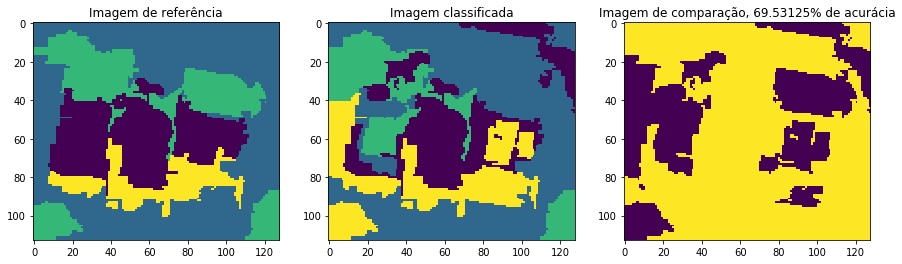

RuntimeError: Attempt to create new tiff file `imagens/comparacao.tif' failed: No such file or directory

In [4]:
# Importação das bibliotecas necessárias
from osgeo import gdal
import numpy as np
from matplotlib import pyplot as plt
import os

# Importação das constantes
from gdalconst import *

# informar o uso de exceções
gdal.UseExceptions()

# biblioteca de funções relacionadas ao sistema
# sys: System-specific parameters and functions
import sys
#definindo o diretorio de trabalho
os.chdir("C:/Users/andre/Documents/lista5/aula20/")
# abrertura das 2 imagens com 1 banda cada
filename_classificacao = "classificacao_area_urbana.tif" 
filename_referencia = "referencia_area_urbana.tif"
try:
    dataset_classificacao = gdal.Open(filename_classificacao, GA_ReadOnly) 
    dataset_referencia = gdal.Open(filename_referencia, GA_ReadOnly) 
except:
    print ("Erro na abertura de algum arquivo!")
    
# verificação da compatibilidade de metadados
if (dataset_referencia.GetProjectionRef() != dataset_classificacao.GetProjectionRef()):
    print("Sistemas de referência diferentes")
elif (dataset_referencia.GetGeoTransform() != dataset_classificacao.GetGeoTransform()):
    print("Metadados espaciais diferentes")
else:
    # obtenção de metadados
    linhas = dataset_referencia.RasterYSize
    colunas = dataset_referencia.RasterXSize

    # abertura da banda de cada imagem
    classificacao = dataset_classificacao.GetRasterBand(1)
    referencia = dataset_referencia.GetRasterBand(1)

    # geraçao de matrizes de pixels
    numpy_referencia = referencia.ReadAsArray()
    numpy_classificacao = classificacao.ReadAsArray()

    # gerção de matriz de comparação
    numpy_comparacao = (numpy_referencia == numpy_classificacao)
    acertos = 100 * numpy_comparacao.sum() / (linhas * colunas)

    # plotagem de resultados
    plt.figure(figsize=(15, 5))

    plt.subplot(131)
    plt.imshow(numpy_referencia)
    plt.title('Imagem de referência')

    plt.subplot(132)
    plt.imshow(numpy_classificacao)
    plt.title('Imagem classificada')

    plt.subplot(133)
    plt.imshow(numpy_comparacao)
    plt.title('Imagem de comparação, ' + str(acertos) + '% de acurácia')

    plt.show()

# salvar imagem de concordância

def salvar_banda(matriz_de_pixels, nome_do_arquivo, dataset_de_referencia):
    # obter metadados
    linhas = dataset_de_referencia.RasterYSize
    colunas = dataset_de_referencia.RasterXSize
    bandas = 1
    # definir driver
    driver = gdal.GetDriverByName('GTiff')
    # copiar tipo de dados da banda já existente
    data_type = dataset_de_referencia.GetRasterBand(1).DataType
    # criar novo dataset
    dataset_output = driver.Create(nome_do_arquivo, colunas, linhas, bandas, data_type)
    # copiar informações espaciais da banda já existente
    dataset_output.SetGeoTransform(dataset_de_referencia.GetGeoTransform())
    # copiar informações de projeção
    dataset_output.SetProjection(dataset_de_referencia.GetProjectionRef())
    # escrever dados da matriz NumPy na banda
    dataset_output.GetRasterBand(1).WriteArray(matriz_de_pixels)
    # salvar valores
    dataset_output.FlushCache()
    # fechar dataset
    dataset_output = None
nome_do_arquivo = "./comparacao.tif"
salvar_banda(numpy_comparacao, nome_do_arquivo, dataset_referencia)

# fechar imagens
dataset_referencia = None
dataset_classificacao = None